# Python LLM Agent

In [1]:
from langchain.agents.agent_toolkits import create_python_agent
from langchain.tools.python.tool import PythonREPLTool
from langchain.python import PythonREPL
from langchain.llms.openai import OpenAI
from langchain.agents.agent_types import AgentType
from langchain.chat_models import ChatOpenAI

In [2]:
agent_executor = create_python_agent(
    llm=OpenAI(temperature=0, max_tokens=1000),
    tool=PythonREPLTool(),
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

In [3]:
agent_executor.run("What is the 10th fibonacci number?")



> Entering new  chain...
 I need to calculate the 10th fibonacci number
Action: Python_REPL
Action Input: def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

print(fibonacci(10))
Observation: 55

Thought: I now know the final answer
Final Answer: The 10th fibonacci number is 55.

> Finished chain.


'The 10th fibonacci number is 55.'

In [4]:
agent_executor.run(
    """Understand, write a single neuron neural network in PyTorch.
Take synthetic data for y=2x. Train for 1000 epochs and print every 100 epochs.
Return prediction for x = 5"""
)



> Entering new  chain...
 I need to write a neural network in PyTorch and train it on the given data
Action: Python_REPL
Action Input: 
import torch

# Define the model
model = torch.nn.Sequential(
    torch.nn.Linear(1, 1)
)

# Define the loss
loss_fn = torch.nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Define the data
x_data = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Train the model
for epoch in range(1000):
    # Forward pass
    y_pred = model(x_data)

    # Compute and print loss
    loss = loss_fn(y_pred, y_data)
    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}: {loss.item():.4f}')

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update the weights
    optimizer.step()

# Make a prediction
x_pred = torch.tensor([[5.0]])
y_pred = model(x_pred)

Observation: Epoch 100: 0.0335
Epoch 200: 0.0184
Epoch 300: 0.0101

'The prediction for x = 5 is 10.00'

# Python Agent - Create Random Data

In [7]:
agent_executor.run(
    """Create a pandas dataframe with random data of the following columns:
    Name, Age, Height and State. Make name a ranom sounding name, age anything 0-100 and height anything 0 - 7ft,
    and use numpy random to randomly select from a normal distribution.
    """
)



> Entering new  chain...
 I need to use pandas and numpy to create a dataframe with random data
Action: Python_REPL
Action Input: 
import pandas as pd
import numpy as np

names = [pd.util.testing.rands(8) for i in range(10)]
ages = np.random.randint(0, 100, 10)
heights = np.random.normal(5, 2, 10)
states = np.random.choice(['CA', 'NY', 'TX', 'FL'], 10)

df = pd.DataFrame({'Name': names, 'Age': ages, 'Height': heights, 'State': states})

Observation: AttributeError("module 'pandas.util' has no attribute 'testing'")
Thought: I need to use a different method to generate random names
Action: Python_REPL
Action Input: 
import pandas as pd
import numpy as np
import random

names = [''.join(random.choices(string.ascii_letters, k=8)) for i in range(10)]
ages = np.random.randint(0, 100, 10)
heights = np.random.normal(5, 2, 10)
states = np.random.choice(['CA', 'NY', 'TX', 'FL'], 10)

df = pd.DataFrame({'Name': names, 'Age': ages, 'Height': heights, 'State': states})

Observation: NameError("na

'df'

In [13]:
import pandas as pd
import numpy as np
import random
import string

names = [''.join(random.choices(string.ascii_letters, k=8)) for i in range(100)]
ages = np.random.randint(0, 100, 100)
heights = np.random.normal(5, 2, 100)
states = np.random.choice(['CA', 'NY', 'TX', 'FL'], 100)

df = pd.DataFrame({'Name': names, 'Age': ages, 'Height': heights, 'State': states})

<AxesSubplot: ylabel='Frequency'>

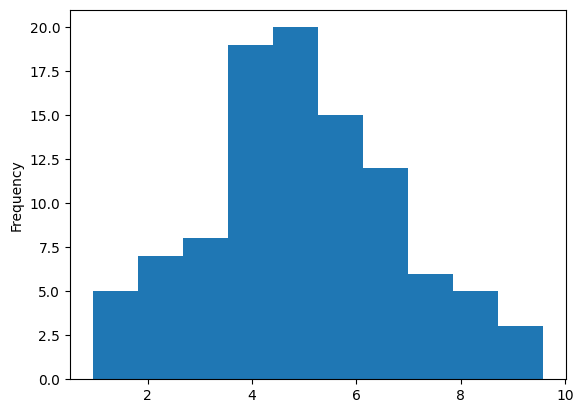

In [14]:
df['Height'].plot(kind='hist')